#################################
##    뉴스 기사 요약 전처리   ##
#################################

0. 라이브러리 임포트

In [50]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import time
from tqdm import tqdm

1. 데이터 불러오기 및 합치기

In [51]:
raw_train_df = pd.read_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/train.csv')
raw_valid_df = pd.read_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/valid.csv')

raw_df = pd.concat([raw_train_df, raw_valid_df], ignore_index=True)

print(f'원본 트레인 데이터 길이 : {len(raw_train_df)}')
print(f'원본 검증 데이터 길이 : {len(raw_valid_df)}')
print(f'예상 최종 데이터 길이 : {len(raw_train_df)+len(raw_valid_df)}')
print(f'실제 데이터 길이 : {len(raw_df)}')
print(raw_df.head())
# raw_df = pd.read_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/finalPreprocess.csv')

원본 트레인 데이터 길이 : 243983
원본 검증 데이터 길이 : 30122
예상 최종 데이터 길이 : 274105
실제 데이터 길이 : 274105
                           title  \
0         논 타작물 재배, 2월 말까지 신청하세요   
1  여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성   
2        “새해 정기 받고 올해는 반드시 일내자!”   
3          농업인 역량 강화, 새해 실용교육 실시   
4          타이완 크루즈관광객 4천여명‘전남’온다   

                                            sentence  \
0  ha당 조사료 400만원…작물별 차등 지원 이성훈 sinawi@hanmail.net...   
1  8억 투입, 고소천사벽화·자산마을에 색채 입혀 이성훈 sinawi@hanmail.n...   
2  전남드래곤즈 해맞이 다짐…선수 영입 활발 이성훈 sinawi@hanmail.net ...   
3  11~24일, 매실·감·참다래 등 지역특화작목 이성훈 sinawi@hanmail.n...   
4  홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항 이성훈 sinawi@hanma...   

                                                 abs  
0  전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 대...  
1  여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사...  
2  전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구단...  
3  광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화작...  
4  올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입항...  


2. title 열 날리기

In [52]:
raw_df = raw_df.iloc[:, 1:]
print(raw_df.head())

                                            sentence  \
0  ha당 조사료 400만원…작물별 차등 지원 이성훈 sinawi@hanmail.net...   
1  8억 투입, 고소천사벽화·자산마을에 색채 입혀 이성훈 sinawi@hanmail.n...   
2  전남드래곤즈 해맞이 다짐…선수 영입 활발 이성훈 sinawi@hanmail.net ...   
3  11~24일, 매실·감·참다래 등 지역특화작목 이성훈 sinawi@hanmail.n...   
4  홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항 이성훈 sinawi@hanma...   

                                                 abs  
0  전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 대...  
1  여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사...  
2  전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구단...  
3  광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화작...  
4  올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입항...  


3. 정규 표현식

In [53]:
sentence = raw_df['sentence']
abs = raw_df['abs']

print("정규 표현식 적용 전 데이터 프레임")
print(raw_df[20:30])

def regex_column(columnList):
  if not isinstance(columnList, str):                                                   # Nan을 빈 문자열로 대체
      return ''
  columnList = re.sub(r'\S+@\S+\.\S+', '', columnList)                                  # 이메일 삭제
  columnList = columnList.replace('\n', '')                                             # 개행 삭제
  columnList = re.sub(r'\[.*?\]|\{.*?\}|\(.*?\)', '', columnList)                       # 소,중,대괄호 내용 삭제
  columnList = re.sub(r'[^가-힣a-zA-Z0-9\u4e00-\u9fff\s.,!?\'\"~]', ' ', columnList)    # 이상한 특수문자 삭제
  columnList = re.sub(r'\s+', ' ', columnList).strip()                                  # 양 끝 공백 삭제
  return columnList

sentence = sentence.apply(regex_column)
abs = abs.apply(regex_column)

df = pd.DataFrame({
    'sentence':sentence,
    'abs':abs
})

print("\n정규 표현식 적용 후 데이터 프레임")
print(df[20:30])

정규 표현식 적용 전 데이터 프레임
                                             sentence  \
20  광양상의, 기업 경기 현황 조사…기업들, 보수적 경영활동 강화 이성훈 sinawi@...   
21  내 인생 첫 스크린‘광양 제일극장’ 광양뉴스 webmaster@gynet.co.kr...   
22  중마도서관‘나만의 그림책 만들기’10권 제작 이성훈 sinawi@hanmail.ne...   
23  1월 말까지, 읍면동 농업인상담소에 신청 이성훈 sinawi@hanmail.net ...   
24  누락자 발생예방 위한 홍보·접수‘총력’ 이성훈 sinawi@hanmail.net 광...   
25  어린이들의 꿈과 희망을 찾는‘희망도서관’ 김영신 기자 yskim0966@naver....   
26  31일까지…위택스? 이성훈 sinawi@hanmail.net 광양시는 매년 6월과 ...   
27  도로점용허가 필수, 규격? 이성훈 sinawi@hanmail.net 광양시는 올해 ...   
28  ‘아이 양육하기 좋은 도시’탄력 기대 이성훈 sinawi@hanmail.net 광양...   
29  시민과 1:1 카톡방…SNS 소통행정 확대 이성훈 sinawi@hanmail.net...   

                                                  abs  
20  광양상공회의소 1분기 기업경기전망 지수(BSI)를 조사한 결과 올해 경기 전망은 지...  
21  80년대 초반 광양 제일극장은 동시대를 살아온 사람들의 추억이 엮여있는 문화의 공간...  
22  광양시가 지난해 3월부터 중마도서관의 성인 대상 야간 프로그램인 ‘나만의 그림책 만...  
23  광양시는 올해 과수·채소·화훼·특작, 식량작물, 기술지원 등 5개 분야 18개 사업...  
24  광양시는 8일 ‘광양시 일자리 안정자금 지원단’ 협의회를 개최하고 일자리 안정자금 ...  
25  ‘희망도서관’은 책을 

4. 난수 날리기

In [54]:
print(f'난수 날리기 전 데이터프레임 길이 : {len(df)}')
df = df.dropna()
print(f'난수 날리기 후 데이터프레임 길이 : {len(df)}')

난수 날리기 전 데이터프레임 길이 : 274105
난수 날리기 후 데이터프레임 길이 : 274105


5. 문자열 길이 제한 하기

5-1. 문자열 길이 시각화


Sentence 열 길이:
최대 길이: 6741, 최소 길이: 3, 평균 길이: 660.49

Abs 열 길이:
최대 길이: 682, 최소 길이: 0, 평균 길이: 127.50


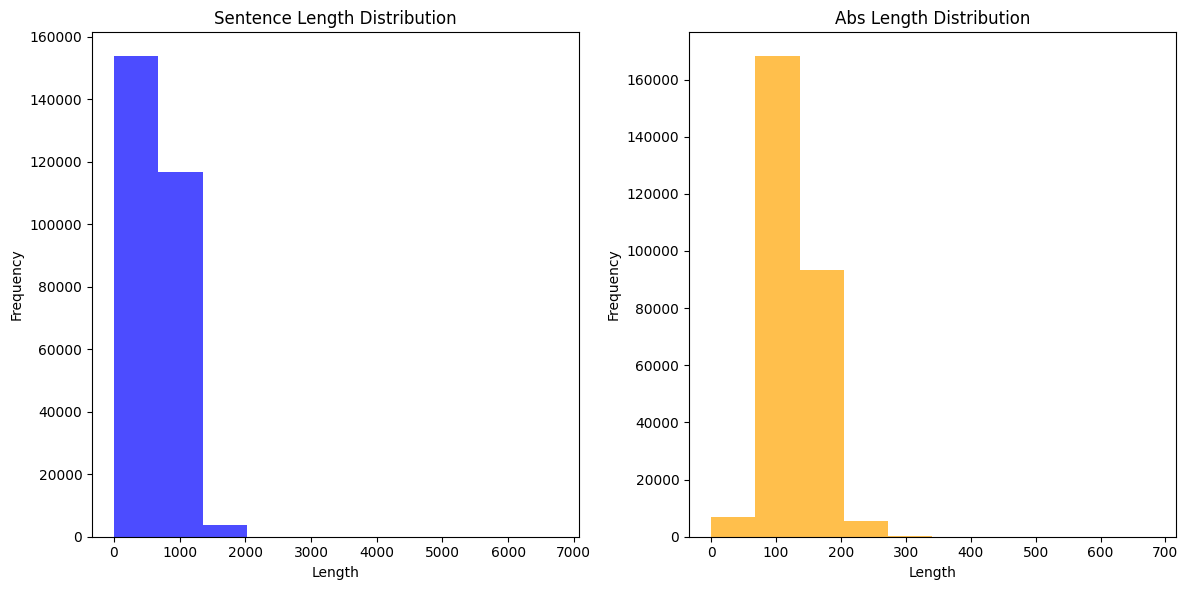

In [55]:
def data_length_distribution(df, sentence='sentence', abs='abs'):
  df['sentence_length'] = df[sentence].apply(len)
  df['abs_length'] = df[abs].apply(len)

  sentence_max_length = df['sentence_length'].max()
  sentence_min_length = df['sentence_length'].min()
  sentence_mean_length = df['sentence_length'].mean()

  abs_max_length = df['abs_length'].max()
  abs_min_length = df['abs_length'].min()
  abs_mean_length = df['abs_length'].mean()

  print("\nSentence 열 길이:")
  print(f"최대 길이: {sentence_max_length}, 최소 길이: {sentence_min_length}, 평균 길이: {sentence_mean_length:.2f}")

  print("\nAbs 열 길이:")
  print(f"최대 길이: {abs_max_length}, 최소 길이: {abs_min_length}, 평균 길이: {abs_mean_length:.2f}")

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.hist(df['sentence_length'], bins=10, color='blue', alpha=0.7)
  plt.title('Sentence Length Distribution')
  plt.xlabel('Length')
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  plt.hist(df['abs_length'], bins=10, color='orange', alpha=0.7)
  plt.title('Abs Length Distribution')
  plt.xlabel('Length')
  plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()
  df = df.drop(columns=['sentence_length','abs_length'])
  
data_length_distribution(df)


5-2. 길이 제한


Sentence 열 길이:
최대 길이: 999, 최소 길이: 11, 평균 길이: 593.81

Abs 열 길이:
최대 길이: 149, 최소 길이: 12, 평균 길이: 111.93


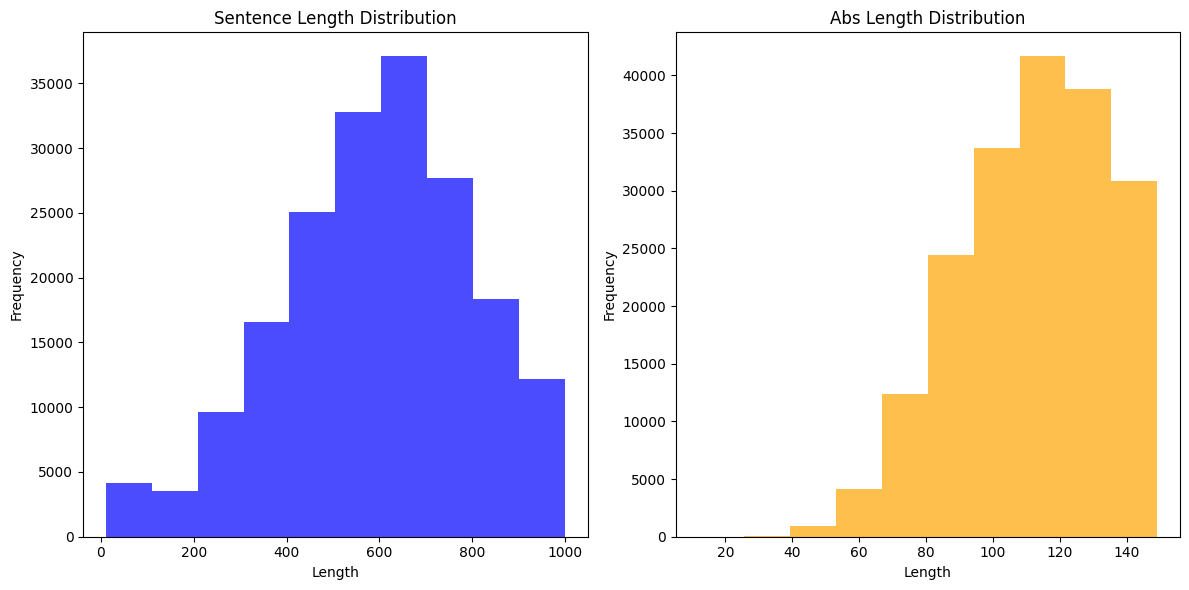

길이 제한 전 데이터 프레임 길이 : 274105
길이 제한 후 데이터 프레임 길이 : 186982
삭제 된 행 : 87123


In [56]:
pre_length = len(df)

df = df[(df['sentence'].str.len() > 10) & (df['sentence'].str.len() < 1000)]
df = df[(df['abs'].str.len() > 10) & (df['abs'].str.len() < 150)] # & (df['abs'].str.len() < 150)

data_length_distribution(df)

after_length = len(df)

print(f'길이 제한 전 데이터 프레임 길이 : {pre_length}')
print(f'길이 제한 후 데이터 프레임 길이 : {after_length}')
print(f'삭제 된 행 : {pre_length-after_length}')

df.to_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/finalPreprocess.csv')

6. 토큰화

6-1. SubwordTokenizer 실행

In [57]:
sentences = []
for sentence in df['sentence']:
    sentences.append(sentence)
abs = []
for sentence in df['abs']:
    abs.append(sentence)

start_time = time.time()

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    sentences + abs, target_vocab_size = 2**14
)

end_time = time.time()
total_time = end_time - start_time

# 초를 시, 분, 초로 변환
hours = int(total_time // 3600)
minutes = int((total_time % 3600) // 60)
seconds = total_time % 60

print(f"토크나이저 총 소요 시간: {hours}시간 {minutes}분 {seconds:.2f}초")
tokenizer.save_to_file('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/tokenizer')

토크나이저 총 소요 시간: 0시간 52분 29.70초


6-2. 토큰화 검증

In [58]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.load_from_file('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/tokenizer')

print(f'토큰 크기: {tokenizer.vocab_size}')
print(f'\n토큰 예시: {tokenizer.subwords[:10]}')
print(f'\n인코딩 테스트 - 전: {sentences[19]}')
encodingList = tokenizer.encode(sentences[19])
print(f'\n인코딩 테스트 - 후: {encodingList}')

토큰 크기: 16360

토큰 예시: ['. ', ', ', '을_', '의_', '에_', '는_', '이_', '를_', '고_', '은_']

인코딩 테스트 - 전: 1월 말까지, 읍면동 농업인상담소에 신청 이성훈 광양시는 농업의 발전과 농업인의 다양한 영농기술 습득을 위해 올해 신기술 보급 시범사업에 10억원을 투자한다. 과수분야 는 기후온난화 대응 아열대소득과수 도입시범으로 1개소, 아열대과수 브랜드 육성 규격박스 1만5000매 제작, 돌발병해충 방제기술 시범보급, 농작물 병해충 방제비 지원 등 4개 사업이 추진된다. 채소분야 는 단동하우스 분산제어 환경조절시스템 보급 이상고온 대응 시설채소 온도저감기술 시범 수정벌 이용 수박생력화 재배 시범 딸기 고설재배 시범 고품질 생강재배단지조성 생강가공공장 신축 생강브랜드육성 규격박스 제작 왕토란 틈새작목 시범 등 총 8개 사업이다. 화훼 특작분야 는 생산비절감 화훼류 경쟁력제고 시범, 화훼 브랜드육성 규격박스 제작, 취나물 비가림하우스 시설 설치, 취나물 브랜드 육성 규격박스 제작 등 4개 사업이 이뤄진다. 사업 참여를 희망하는 농가는 오는 31일까지 해당 읍면동 농업인상담소를 방문해 사업을 신청하면 된다. 시는 오는 3월 중에 확정될 사업을 차질 없이 진행될 수 있도록 사업비를 신속하게 투입해 지역경제 활성화를 이끌어 낼 방침이다.

인코딩 테스트 - 후: [930, 496, 1158, 2, 12291, 16136, 3048, 998, 7853, 1869, 6359, 889, 5296, 6, 857, 4, 6207, 3048, 4, 59, 3740, 623, 2002, 2268, 3, 29, 70, 10397, 6080, 4191, 5, 10467, 3, 13485, 26, 1, 7522, 487, 6, 7557, 483, 635, 269, 2006, 103, 10854, 1506, 7522, 16136, 1407, 3920, 20, 3179, 134, 2, 103, 10854, 7522, 16136, 76

7. 구분 토큰 추가 및 패딩

In [59]:
start_time = time.time()
beforeSentence = sentences[99]
beforeAbs = abs[99]

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size+1]
VOCAB_SIZE = tokenizer.vocab_size + 2

SEN_MAX_LENGTH = 999
ABS_MAX_LENGTH = 149

def tokenized_and_padding(sentences, abses):
  tokenized_sentence, tokenized_abs = [], []
  
  for (sentence, abs) in zip(sentences, abses):
    sentence = START_TOKEN + tokenizer.encode(sentence) + END_TOKEN
    abs = START_TOKEN + tokenizer.encode(abs) + END_TOKEN
    
    tokenized_sentence.append(sentence)
    tokenized_abs.append(abs)
    
  tokenized_sentence = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_sentence, maxlen=SEN_MAX_LENGTH, padding='post'
    )
  tokenized_abs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_abs, maxlen=ABS_MAX_LENGTH, padding='post'
  )
  
  return tokenized_sentence, tokenized_abs

sentences, abs = tokenized_and_padding(sentences, abs)

print(f'sentence 원본 : {beforeSentence}')
print(f'\nsentence 토큰화 및 패딩 결과 : {sentences[99]}')
print(f'\nabs 원본 : {beforeAbs}')
print(f'\nabs 토큰화 및 패딩 결과 : {abs[99]}')

end_time = time.time()
total_time = end_time - start_time
minutes, seconds = divmod(total_time, 60)

print(f"\n총 소요 시간: {int(minutes)}분 {seconds:.2f}초")

sentence 원본 : 마을공동체 활성화, 마을가꾸기, 희망마을 만들기 이성훈 순천시는 오는 16일까지 주민 스스로 행복한 도시, 따뜻한 순천을 만들어가는 2018 따순마을 만들기 공모사업 참여 신청을 받는다. 따순 마을 만들기 사업 은 순천시에 주소를 둔 5인 이상의 주민모임 또는 비영리 단체 등이 참여할 수 있다. 사업 참여를 원하는 단체 및 주민모임은 관련 서류를 구비해 읍면동행정복지센터 또는 순천시 마을공동체지원센터로 제출하면 된다. 참여사업 유형은 마을가꾸기 마을알리기 마을지키기 마을꿈꾸기 마을나누기 지역자원을 활용하여 마을공동체를 활성화하거나 지역문제를 해결 할 수 있는 사업 등이다. 이와 함께 순천시는 지역 현안문제를 공동으로 논의하고 협업을 통한 문제해결로 마을공동체 형성에 기여하는 순천형 희망마을 만들기 사업 도 공모 중이다. 자세한 사항은 순천시청 홈페이지를 참고하거나, 시민소통과 또는 마을공동체지원센터로 문의하면 된다.

sentence 토큰화 및 패딩 결과 : [16360 15039 16136  1530     2   655 13069    69     2  1085   902  1487
  6359   889  9478     6    73 15022   896  2870  2130   433     2  3538
  4400     3 13789     6  4301  1396   539   902  1487 12309  1036  2590
  2591     1  1396  2180   902  1487   129    10  9478     5  4293     8
  3118 16157    30  1347   622 13277   692 15236 16136  1223   219  2334
    19    16     1   129  2067  2132  1223    28   622  3875    10   126
 11066 14256    31 12291  5887 16136   692  9478 16136 15039 

8. 결과 저장

In [61]:
import pickle

with open('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/pickle/sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)

with open('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/pickle/abs.pkl', 'wb') as f:
    pickle.dump(abs, f)

print('피클 저장 완료!')

피클 저장 완료!
